In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [62]:
data=pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Random forest\\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [64]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [65]:
data.duplicated().sum()

0

In [66]:
data['ShelveLoc']=data['ShelveLoc'].astype('category')
data['US']=data['US'].astype('category')
data['Urban']=data['Urban'].astype('category')

In [67]:
data.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [68]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [69]:
Sales_cat=[]
for i in data['Sales']:
    if i>=7.49:
        Sales_cat.append('Good')
    else:
        Sales_cat.append('Bad')

In [70]:
Sales_cat_df=pd.DataFrame(Sales_cat,columns=['Sales_cat'])

In [71]:
data['Sales_cat']=Sales_cat_df

In [72]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Bad
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Bad
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Bad
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Bad


In [73]:
data['ShelveLoc']=data['ShelveLoc'].cat.codes
data['US']=data['US'].cat.codes
data['Urban']=data['Urban'].cat.codes

In [74]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,Good
1,11.22,111,48,16,260,83,1,65,10,1,1,Good
2,10.06,113,35,10,269,80,2,59,12,1,1,Good
3,7.40,117,100,4,466,97,2,55,14,1,1,Bad
4,4.15,141,64,3,340,128,0,38,13,1,0,Bad


In [75]:
data.boxplot(figsize=(10,7))

<AxesSubplot:>

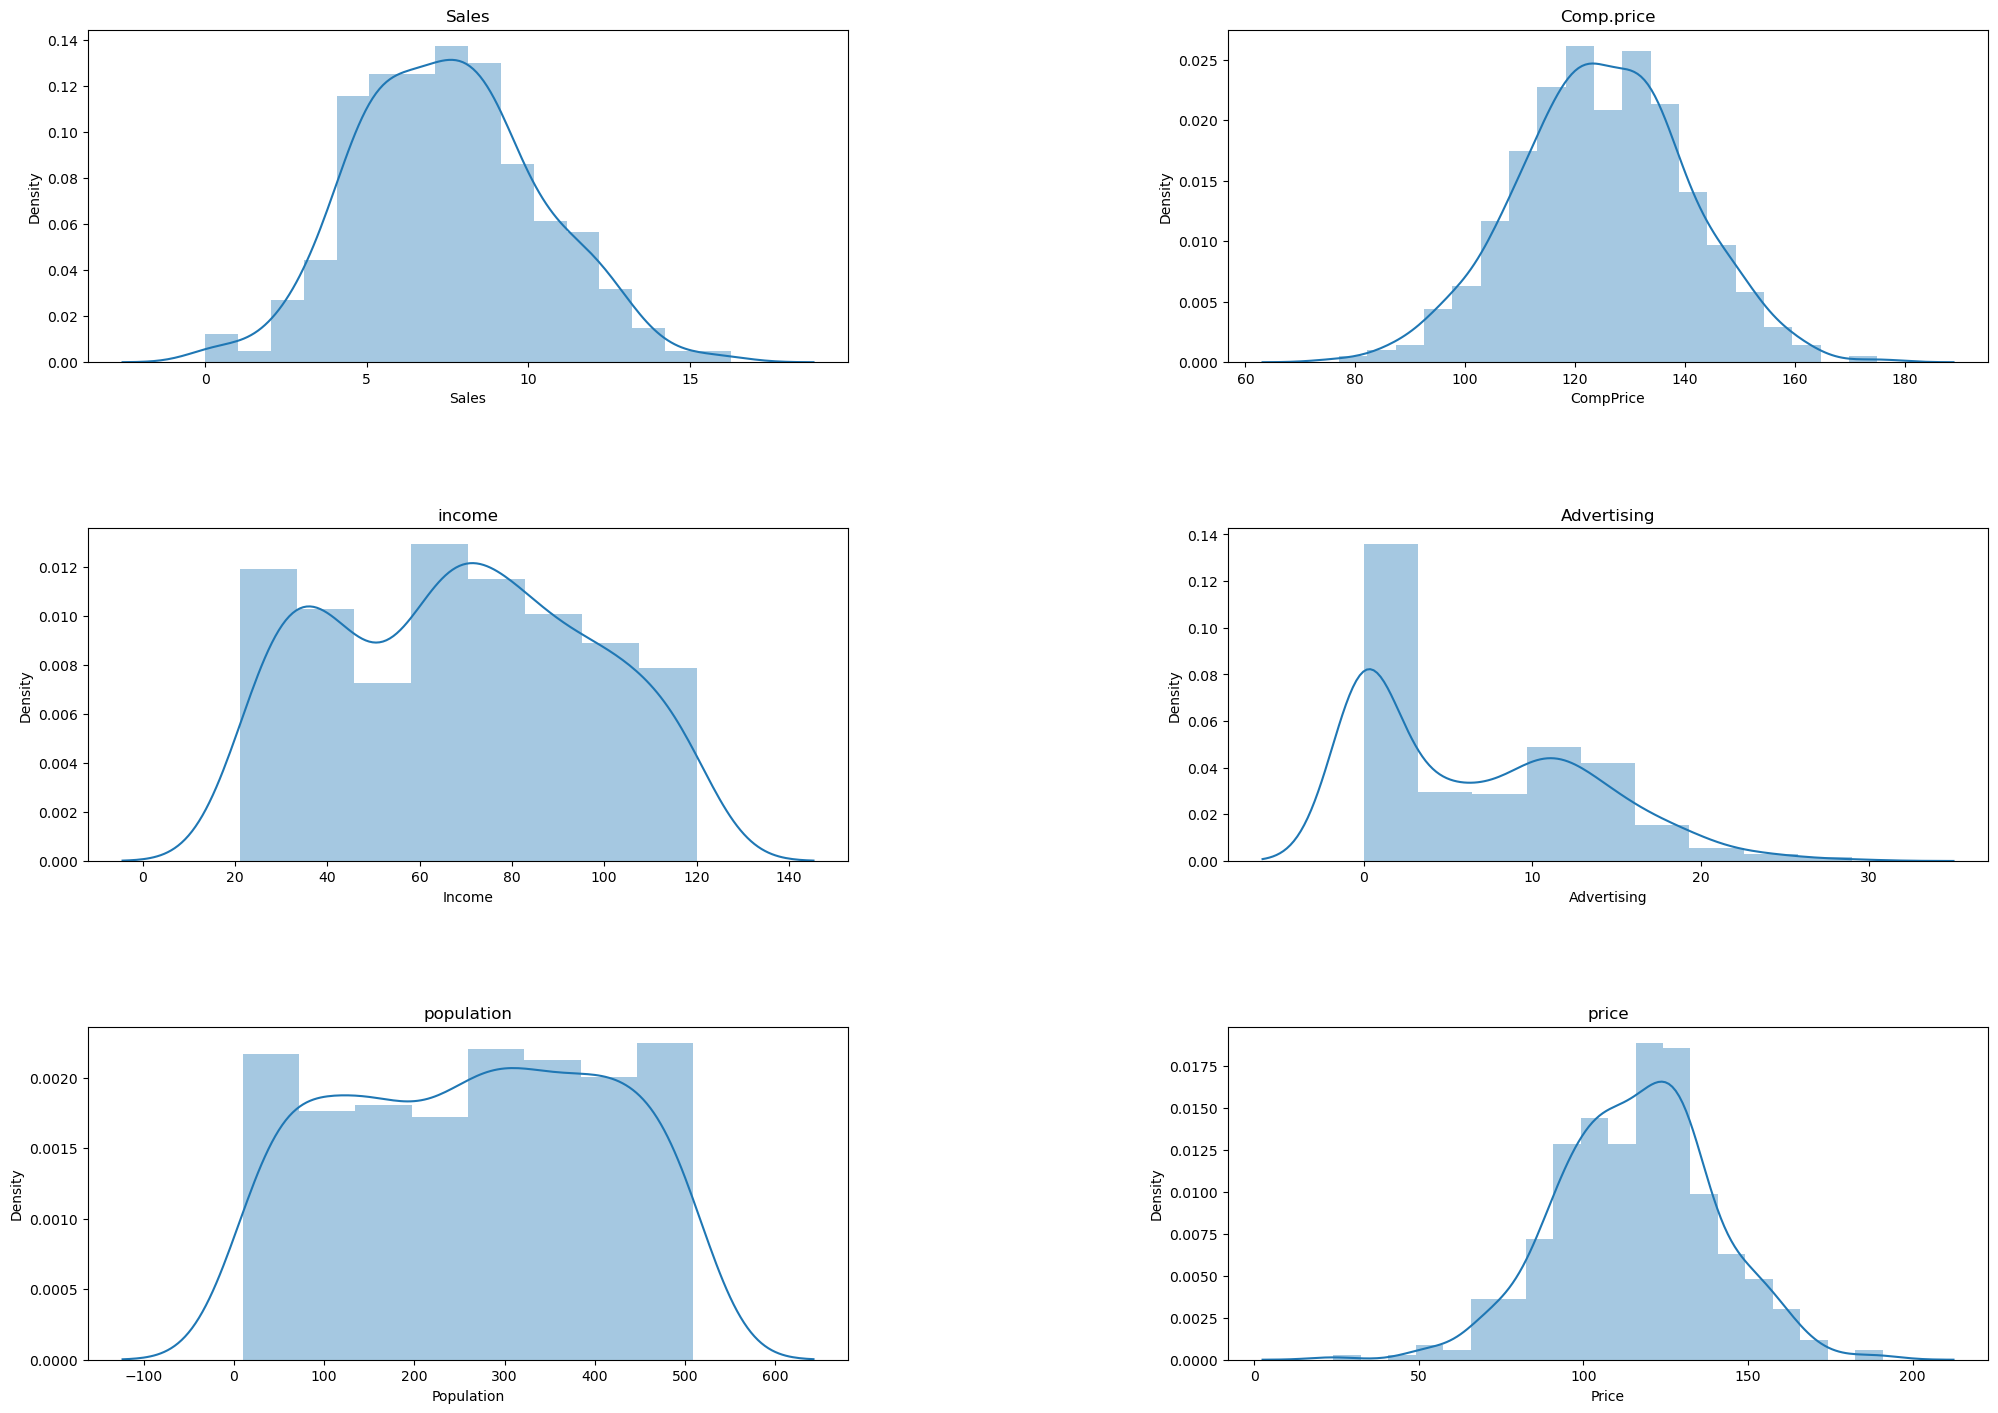

In [76]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2, wspace=0.5,hspace=0.5)
plt.subplot(3,2,1)
sns.distplot(data['Sales'])
plt.title('Sales')
plt.subplot(3,2,2)
sns.distplot(data['CompPrice'])
plt.title('Comp.price')
plt.subplot(3,2,3)
sns.distplot(data['Income'])
plt.title('income')
plt.subplot(3,2,4)
sns.distplot(data['Advertising'])
plt.title('Advertising')
plt.subplot(3,2,5)
sns.distplot(data['Population'])
plt.title('population')
plt.subplot(3,2,6)
sns.distplot(data['Price'])
plt.title('price')
plt.show()

In [77]:
data1=data.drop(columns=['Sales'],axis=1)

In [78]:
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,0,42,17,1,1,Good
1,111,48,16,260,83,1,65,10,1,1,Good
2,113,35,10,269,80,2,59,12,1,1,Good
3,117,100,4,466,97,2,55,14,1,1,Bad
4,141,64,3,340,128,0,38,13,1,0,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,Good
396,139,23,3,37,120,2,55,11,0,1,Bad
397,162,26,12,368,159,2,40,18,1,1,Bad
398,100,79,7,284,95,0,50,12,1,1,Bad


In [80]:
data1['Sales_cat']=data1['Sales_cat'].astype('category')
data1['Sales_cat']=data1['Sales_cat'].cat.codes

In [ ]:
# correlation analysis

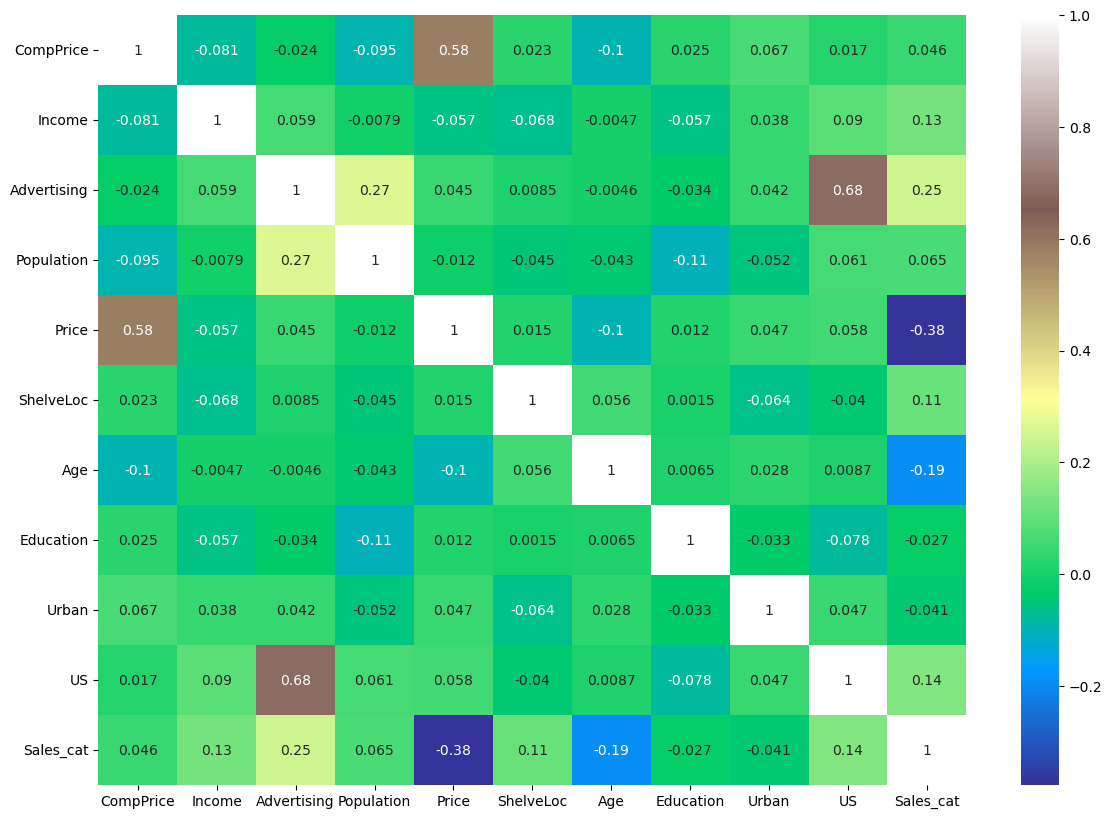

In [136]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(data1.corr(),annot=True,cmap='terrain')
plt.show()

In [ ]:
# adverising & us-moderately positively correlated
# price and compprice also slightly correlated

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(data1.values,i)for i in range(data1.shape[1])]
vif['variable'] = data1.columns

In [143]:
vif

,vif,variable
0,93.702806,CompPrice
1,6.801197,Income
2,4.474659,Advertising
3,4.428767,Population
4,56.038523,Price
5,3.571814,ShelveLoc
6,11.370543,Age
7,22.918015,Education
8,3.428100,Urban
9,5.506700,US


In [81]:
x=data1.drop(columns=['Sales_cat'])

In [82]:
y=data1['Sales_cat']

In [22]:
# normalization

In [83]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [84]:
X=norm_func(x)
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0


In [85]:
#train test split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [87]:
# Model building using the Random forest

In [88]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(np.mean(y_test==y_pred))

0.7875


In [89]:
#kfold cross validation
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(model,X,y,cv=kfold)
print(results.mean())

0.8


In [90]:
# using gridsearch to find the hyperparameter

In [91]:
from sklearn.model_selection import GridSearchCV
gmodel=RandomForestClassifier() 
param_grid=({'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)}) 
random=RandomizedSearchCV(model,param_grid)
random.fit(x_train,y_train) 
 

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_leaf_nodes': range(2, 20),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [92]:
random.best_params_

{'n_estimators': 200,
 'max_leaf_nodes': 19,
 'max_depth': 6,
 'criterion': 'gini'}

In [ ]:
# building final model

In [106]:
model_final=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=6,max_leaf_nodes=19)

In [109]:
model_final.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=19, n_estimators=200)

In [128]:
y_pred=model_final.predict(x_test)
print(np.mean(y_test==y_pred))

0.8125


In [139]:
y_pred1=model_final.predict(x_train)
print(np.mean(y_train==y_pred1))

0.940625


In [ ]:
# kFOLD cross validation

In [129]:
results_1=cross_val_score(model_final,x_train,y_train,cv=10)
print(results_1.mean())

0.790625


In [ ]:
# confusion matrix

In [130]:
from sklearn.metrics import confusion_matrix,roc_curve,ConfusionMatrixDisplay
from sklearn import metrics

In [124]:
y_test=y_test.values

In [127]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int8)

In [131]:
confusionmatrix=metrics.confusion_matrix(y_test,y_pred)


In [132]:
confusionmatrix

array([[29,  8],
       [ 7, 36]], dtype=int64)

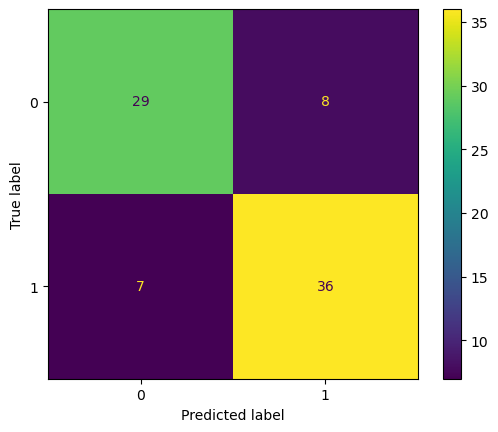

In [133]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix,display_labels=model_final.classes_)
disp.plot()
plt.show()

0.9407329270198468


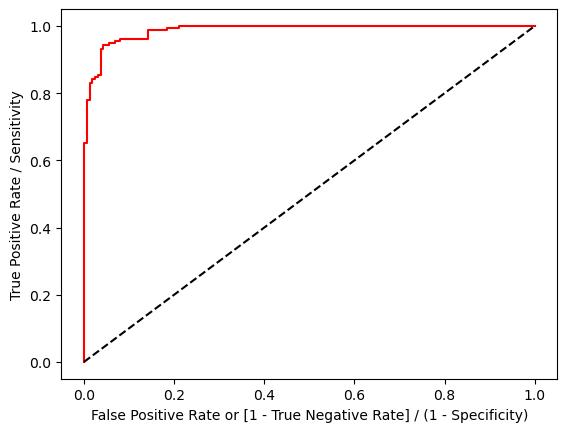

In [137]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, model_final.predict_proba(x_train)[:,1])
prediction=model_final.predict(x_train)
auc = roc_auc_score(y_train, prediction)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

0.8104965430546827


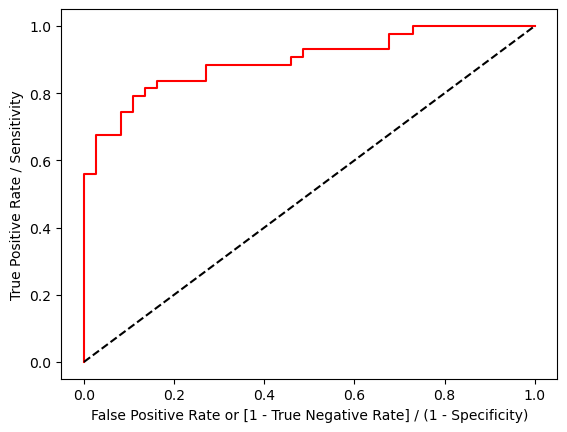

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model_final.predict_proba(x_test)[:,1])
prediction=model_final.predict(x_test)
auc = roc_auc_score(y_test, prediction)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()